<a href="https://colab.research.google.com/github/Varshithdevasani/CVIP-Speech-Emotion-Recoginition/blob/main/Speech_Emotion_Recoginition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
Root = "/content/drive/MyDrive/speech-emotion-recognition-ravdess-data"
os.chdir(Root)

In [ ]:
ls

Actor_01/  Actor_06/  Actor_11/  Actor_16/  Actor_21/
Actor_02/  Actor_07/  Actor_12/  Actor_17/  Actor_22/
Actor_03/  Actor_08/  Actor_13/  Actor_18/  Actor_23/
Actor_04/  Actor_09/  Actor_14/  Actor_19/  Actor_24/
Actor_05/  Actor_10/  Actor_15/  Actor_20/  modelForPrediction1.sav


In [ ]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
import librosa
import numpy as np

def extract_feature(file_name, mfcc=True, chroma=True, mel=True):
    X, sample_rate = librosa.load(file_name, dtype="float32")

    result = np.array([])
    if mfcc:
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=1)
        result = np.hstack((result, mfccs))
    if chroma:
        chroma = np.mean(librosa.feature.chroma_stft(y=X, sr=sample_rate), axis=1)
        result = np.hstack((result, chroma))
    if mel:
        mels = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate), axis=1)
        result = np.hstack((result, mels))
    return result


In [ ]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [ ]:
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("/content/drive/MyDrive/speech-emotion-recognition-ravdess-data/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, )
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [ ]:
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

In [ ]:
x_train

array([[-6.53537292e+02,  8.38638000e+01, -4.97378445e+00, ...,
         6.15795609e-13,  6.00442656e-13,  5.90830065e-13],
       [-6.99477112e+02,  5.95201187e+01, -1.96973267e+01, ...,
         8.69835471e-17,  1.01388626e-16,  3.69712312e-17],
       [-6.67635681e+02,  6.05004730e+01, -2.04214096e+01, ...,
         8.22592817e-16,  6.61060299e-16,  5.26257758e-16],
       ...,
       [-5.68323975e+02,  6.12816772e+01, -1.12785368e+01, ...,
         6.65226988e-13,  6.50537350e-13,  6.39437884e-13],
       [-6.66041870e+02,  7.08413544e+01, -4.29414101e+01, ...,
         1.33981666e-13,  1.30577542e-13,  1.28472130e-13],
       [-5.98209778e+02,  6.32799911e+01, -1.13999157e+01, ...,
         1.16627004e-13,  1.13866504e-13,  1.11625966e-13]])

In [ ]:
#Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(576, 192)


In [ ]:
#Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 153


In [ ]:
#Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [ ]:

model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [ ]:
#Predict for the test set
y_pred=model.predict(x_test)

In [ ]:
y_pred

array(['calm', 'calm', 'fearful', 'happy', 'happy', 'fearful', 'calm',
       'fearful', 'calm', 'happy', 'fearful', 'fearful', 'happy',
       'fearful', 'calm', 'calm', 'calm', 'fearful', 'calm', 'fearful',
       'calm', 'calm', 'calm', 'fearful', 'fearful', 'fearful', 'fearful',
       'fearful', 'calm', 'calm', 'calm', 'calm', 'fearful', 'fearful',
       'calm', 'fearful', 'fearful', 'fearful', 'calm', 'fearful', 'calm',
       'fearful', 'fearful', 'calm', 'fearful', 'calm', 'fearful', 'calm',
       'calm', 'fearful', 'calm', 'fearful', 'fearful', 'fearful', 'calm',
       'fearful', 'calm', 'calm', 'calm', 'calm', 'fearful', 'happy',
       'fearful', 'calm', 'fearful', 'calm', 'calm', 'happy', 'calm',
       'calm', 'fearful', 'fearful', 'fearful', 'calm', 'fearful',
       'fearful', 'fearful', 'fearful', 'calm', 'calm', 'fearful', 'calm',
       'fearful', 'fearful', 'calm', 'fearful', 'calm', 'happy', 'calm',
       'fearful', 'fearful', 'calm', 'calm', 'fearful', 'fearful

In [ ]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 53.12%


<ipython-input-31-23f70e4d7190>:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(reduced_features[indices, 0], reduced_features[indices, 1],


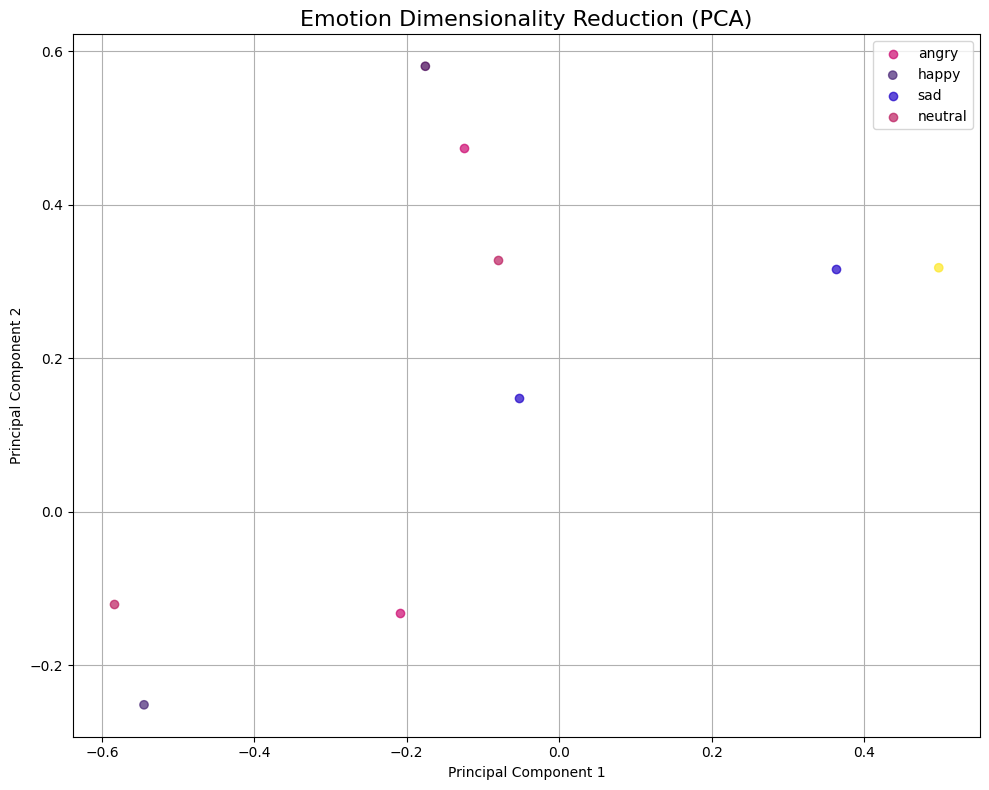

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Function to create the emotion dimensionality reduction plot using PCA
def plot_emotion_dimensionality_reduction(emotion_features, emotion_labels):
    # Perform PCA to reduce feature dimensions to 2 for visualization
    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(emotion_features)

    # Get unique emotion labels
    unique_labels = list(set(emotion_labels))

    # Create a dictionary to map each emotion label to a color for visualization
    label_colors = {label: np.random.rand(3,) for label in unique_labels}

    # Plot the emotion dimensionality reduction
    plt.figure(figsize=(10, 8))
    for label in unique_labels:
        indices = [i for i, x in enumerate(emotion_labels) if x == label]
        plt.scatter(reduced_features[indices, 0], reduced_features[indices, 1],
                    c=label_colors[label], label=label, alpha=0.7)

    plt.title('Emotion Dimensionality Reduction (PCA)', fontsize=16)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Replace 'emotion_features' with a numpy array of your extracted emotion features (shape: [num_samples, num_features])
    # Replace 'emotion_labels' with a list of emotion labels corresponding to each speech sample
    emotion_features = np.random.rand(100, 10)  # Example random feature matrix
    emotion_labels = ['happy', 'sad', 'angry', 'happy', 'happy', 'sad', 'neutral', 'neutral', 'angry']

    # Create the emotion dimensionality reduction plot using PCA
    plot_emotion_dimensionality_reduction(emotion_features, emotion_labels)


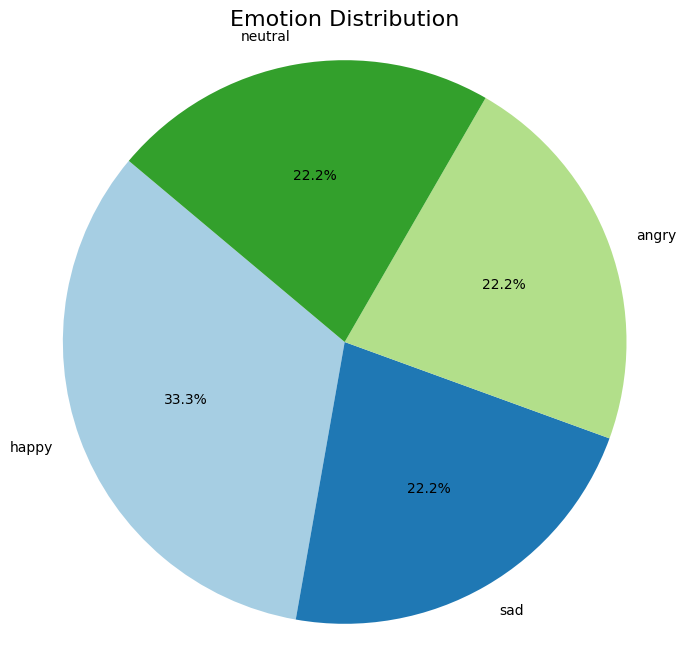

In [ ]:
import matplotlib.pyplot as plt

# Function to create an emotion distribution pie chart
def plot_emotion_distribution(emotion_labels):
    # Count the occurrences of each emotion label
    label_counts = {}
    for label in emotion_labels:
        label_counts[label] = label_counts.get(label, 0) + 1

    # Extract emotion labels and their corresponding counts
    labels, counts = zip(*label_counts.items())

    # Plot the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title('Emotion Distribution', fontsize=16)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Example usage
if __name__ == "__main__":
    # Replace 'emotion_labels' with a list of emotion labels from your dataset
    emotion_labels = ['happy', 'sad', 'angry', 'happy', 'happy', 'sad', 'neutral', 'neutral', 'angry']

    # Create the emotion distribution pie chart
    plot_emotion_distribution(emotion_labels)


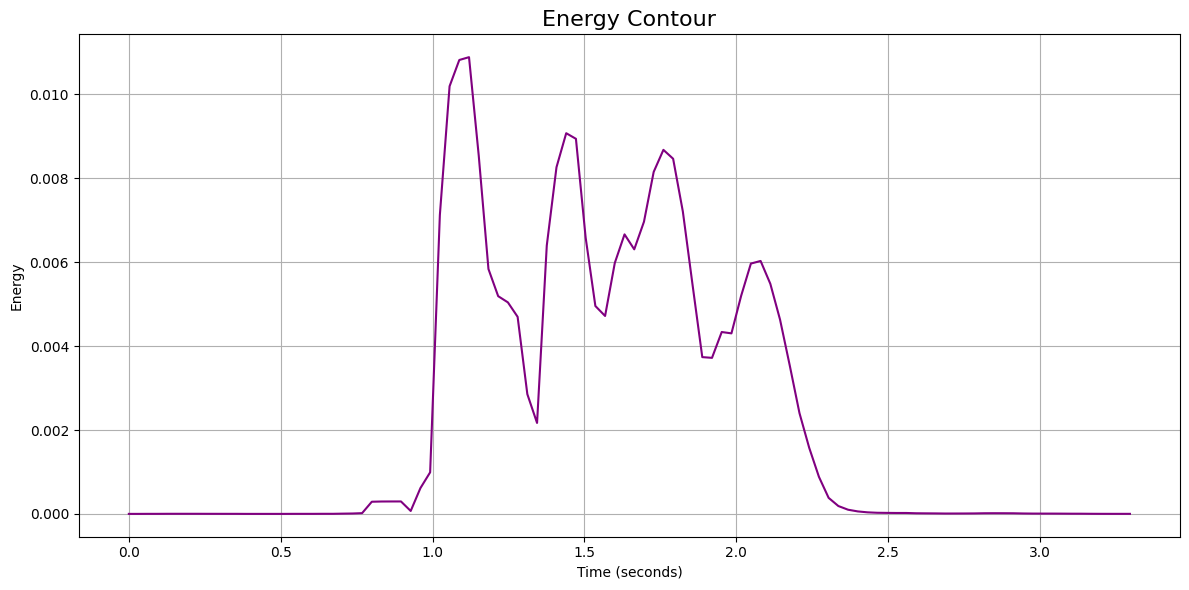

In [ ]:
import librosa
import matplotlib.pyplot as plt

# Function to create the energy contour graph
def plot_energy_contour(audio_file):
    # Load the audio file using librosa
    y, sr = librosa.load(audio_file, sr=None)

    # Compute the short-term energy (root mean square) of the speech signal
    energy = librosa.feature.rms(y=y)

    # Get the time axis for the energy contour
    time = librosa.times_like(energy, sr=sr)

    # Plot the energy contour
    plt.figure(figsize=(12, 6))
    plt.plot(time, energy[0], color='purple')
    plt.title('Energy Contour', fontsize=16)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Energy')
    plt.grid()
    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Replace 'your_audio_file.wav' with the path to your speech audio file
    audio_file_path =  "/content/drive/MyDrive/speech-emotion-recognition-ravdess-data/Actor_01/03-01-01-01-01-01-01.wav"

    # Create the energy contour graph
    plot_energy_contour(audio_file_path)


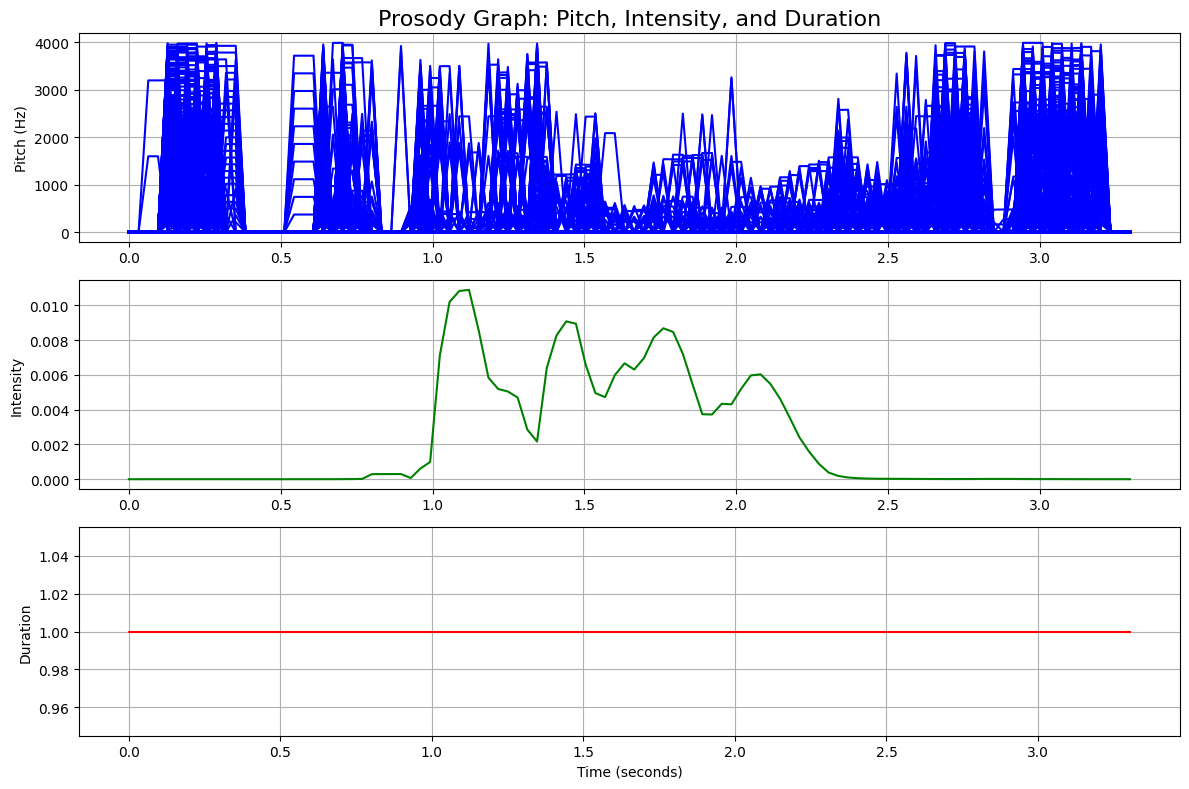

In [ ]:
import librosa
import matplotlib.pyplot as plt

# Function to create the prosody graph
def plot_prosody_graph(audio_file):
    # Load the audio file using librosa
    y, sr = librosa.load(audio_file, sr=None)

    # Compute the pitch (fundamental frequency) of the speech signal
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)

    # Compute the root-mean-square (RMS) energy of the speech signal
    energy = librosa.feature.rms(y=y)

    # Get the time axis for the prosody graph
    time = librosa.times_like(pitches, sr=sr)

    # Plot the prosody graph
    plt.figure(figsize=(12, 8))

    # Plot pitch contour
    plt.subplot(3, 1, 1)
    plt.plot(time, pitches.T, color='blue')
    plt.title('Prosody Graph: Pitch, Intensity, and Duration', fontsize=16)
    plt.ylabel('Pitch (Hz)')
    plt.grid()

    # Plot intensity contour
    plt.subplot(3, 1, 2)
    plt.plot(time, energy[0], color='green')
    plt.ylabel('Intensity')
    plt.grid()

    # Plot duration
    duration = librosa.get_duration(y=y, sr=sr)
    plt.subplot(3, 1, 3)
    plt.plot([0, duration], [1, 1], color='red')
    plt.ylabel('Duration')
    plt.xlabel('Time (seconds)')
    plt.grid()

    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Replace 'your_audio_file.wav' with the path to your speech audio file
    audio_file_path ="/content/drive/MyDrive/speech-emotion-recognition-ravdess-data/Actor_01/03-01-01-01-01-01-01.wav"

    # Create the prosody graph
    plot_prosody_graph(audio_file_path)


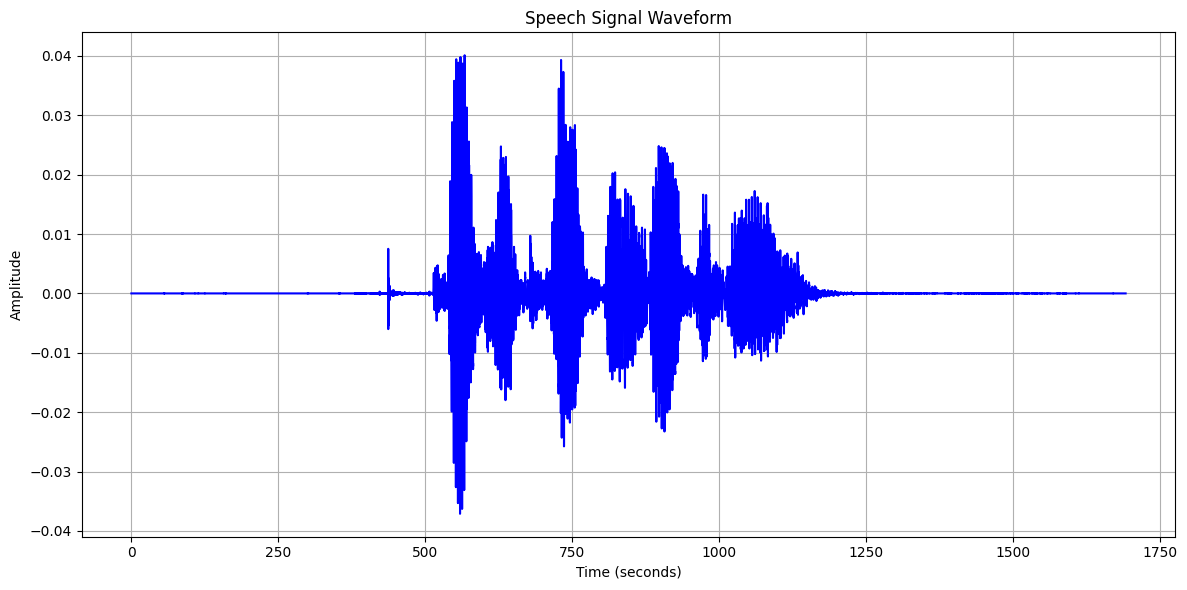

In [ ]:
import librosa
import matplotlib.pyplot as plt

# Function to plot the waveform
def plot_waveform(audio_file):
    # Load the audio file using librosa
    y, sr = librosa.load(audio_file, sr=None)

    # Get the time axis for the waveform
    time = librosa.times_like(y, sr=sr)

    # Plot the waveform
    plt.figure(figsize=(12, 6))
    plt.plot(time, y, color='blue')
    plt.title('Speech Signal Waveform')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Replace 'your_audio_file.wav' with the path to your speech audio file
    audio_file_path = "/content/drive/MyDrive/speech-emotion-recognition-ravdess-data/Actor_01/03-01-01-01-01-01-01.wav"

    # Plot the waveform
    plot_waveform(audio_file_path)

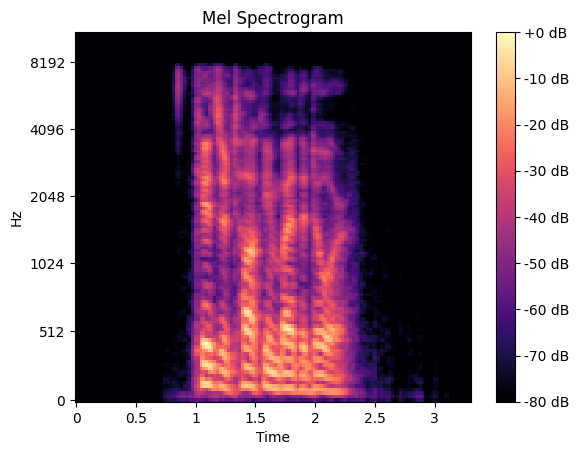

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

audio_file_path = "/content/drive/MyDrive/speech-emotion-recognition-ravdess-data/Actor_01/03-01-01-01-01-01-01.wav"
y, sr = librosa.load(audio_file_path)

S = librosa.feature.melspectrogram(y=y, sr=sr)

librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
f1_score(y_test, y_pred,average=None)

array([0.73282443, 0.        , 0.56296296, 0.41025641])

In [ ]:
import pandas as pd
df=pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df.head(20)

,Actual,Predicted
0,fearful,calm
1,calm,calm
2,fearful,fearful
3,disgust,happy
4,happy,happy
5,happy,fearful
6,happy,calm
7,happy,fearful
8,disgust,calm
9,happy,happy


In [ ]:
import pickle
with open( 'modelForPrediction1.sav', 'wb') as f:
    pickle.dump(model,f)

In [ ]:
feature

array([[-7.04823425e+02,  6.53288727e+01, -9.19415855e+00,
         2.13759346e+01, -2.19000325e-01,  6.97934771e+00,
        -8.27524948e+00,  2.18102723e-01, -1.30709763e+01,
        -2.21690655e+00,  1.03323686e+00, -4.23244810e+00,
         3.54141784e+00,  5.58143854e-01,  5.48493326e-01,
         4.71542627e-01,  4.73784119e-01,  5.25191963e-01,
         5.29903471e-01,  5.71941912e-01,  6.04967833e-01,
         6.30566120e-01,  5.98015845e-01,  5.77523708e-01,
         4.97576684e-01,  1.39239830e-06,  5.60121152e-05,
         3.62368487e-03,  2.09439714e-02,  3.13961394e-02,
         1.76842660e-02,  3.45229614e-03,  1.86057873e-02,
         2.46685632e-02,  2.04533935e-02,  2.19565798e-02,
         1.07420925e-02,  7.94340484e-03,  7.29931472e-03,
         1.51041951e-02,  3.63941491e-02,  4.98254746e-02,
         1.29398555e-02,  9.52597149e-03,  1.82860326e-02,
         3.88188176e-02,  1.36699220e-02,  2.03850423e-03,
         3.92225571e-03,  1.24087352e-02,  1.84398238e-0

In [ ]:
filename = 'modelForPrediction1.sav'
loaded_model = pickle.load(open(filename, 'rb'))

feature=extract_feature("/content/drive/MyDrive/speech-emotion-recognition-ravdess-data/Actor_01/03-01-01-01-01-01-01.wav", mfcc=True, chroma=True, mel=True)

feature=feature.reshape(1,-1)

prediction=loaded_model.predict(feature)
prediction

array(['fearful'], dtype='<U7')